# Code to Generate Figures

This notebook contains code to create figures similar to those in the paper, "Stochastic Expectation-Maximization for Shuffled Linear Regression" by Abid _et al._, which appeared in the 2018 Allerton Conference. Note that not all of the hyperparameters are the same between the code in this notebook and the figures in the original paper (please see the original paper for the hyperparameters used in the original figures).

In [1]:
import sys, os;
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from utils import *
from algorithms import *
from scipy.io import savemat

%load_ext autoreload
%matplotlib inline
%autoreload 2

np.set_printoptions(precision=2)
lr =  LinearRegression(fit_intercept=False)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

# Figure 2(a)

In [2]:
d = 30
noise = 1
iters = 5
ns = np.linspace(100,500,5,dtype=int)

error_hard = np.zeros((iters,len(ns)))
error_soft = np.zeros((iters,len(ns)))

for i in range(iters):
    print(i, end='| ')
    x_, y__, w0_ = generate_distribution(n=np.max(ns), dim=d,  dist='normal', bias=False, noise=0)
    y_ = y__ + np.random.normal(0,noise,y__.shape)
    for n_i, n in enumerate(ns):
        print(n, end=' ')
        y = y_[:n]; x = x_[:n]
        y = np.random.permutation(y)
        weights = em_mcmc(x,y,steps=50,return_all_weights=True)
        error = calc_error(w0_, weights[-1])
        error_soft[i,n_i] = error

        weights = sls(x,y,steps=50,return_all_weights=True, n_starts=n)
        error = calc_error(w0_, weights[-1])
        error_hard[i,n_i] = error

0| 100 200 300 

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(ns,np.mean(error_hard,axis=0),'o-',label='Hard')
ax.fill_between(ns,
                np.mean(error_hard,axis=0)-np.std(error_hard,axis=0),
                np.mean(error_hard,axis=0)+np.std(error_hard,axis=0),
                alpha=0.3)
ax.plot(ns,np.mean(error_soft,axis=0),'o-',label='Stochastic')
ax.fill_between(ns,
                np.mean(error_soft,axis=0)-np.std(error_soft,axis=0),
                np.mean(error_soft,axis=0)+np.std(error_soft,axis=0),
                alpha=0.3)
ax.set_ylabel('Inference Error')
ax.set_xlabel('n')
ax.set_title('Inference Error')
ax.legend(fancybox=True, framealpha=0.5,loc='upper left')

# Figure 2(b)

In [24]:
d = 10
noise = 1
iters = 30
error_hard_sample = np.zeros(iters)
error_soft_sample = np.zeros(iters)

for i in range(iters):
    print(i, end=' ')
    x_, y__, w0_ = generate_distribution(n=250, dim=d,  dist='normal', bias=False, noise=0)
    y_ = y__ + np.random.normal(0,noise,y__.shape)
    y = y_[:n]; x = x_[:n]
    y = np.random.permutation(y)
    weights = em_mcmc(x,y,steps=50,return_all_weights=True)
    error = calc_error(w0_, weights[-1])
    error_soft_sample[i] = error

    weights = sls(x,y,steps=50,return_all_weights=True, n_starts=n)
    error = calc_error(w0_, weights[-1])
    error_hard_sample[i] = error

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

Text(0,0.5,'Parameter Error (Stochastic EM)')

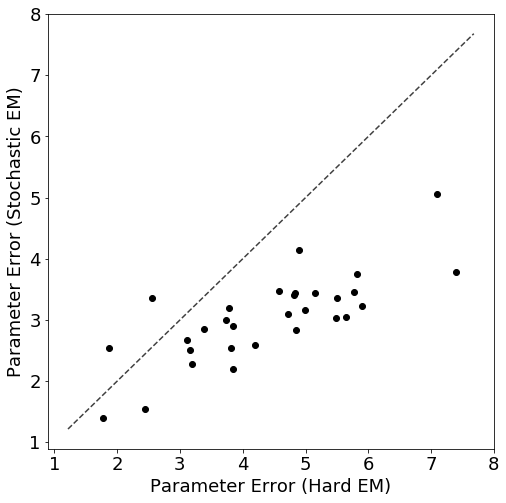

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(error_hard_sample.squeeze(),error_soft_sample.squeeze(),'ko')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.set_xlabel('Parameter Error (Hard EM)')
ax.set_ylabel('Parameter Error (Stochastic EM)')

# Figure 3

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

Text(0,0.5,'Parameter Error at Step')

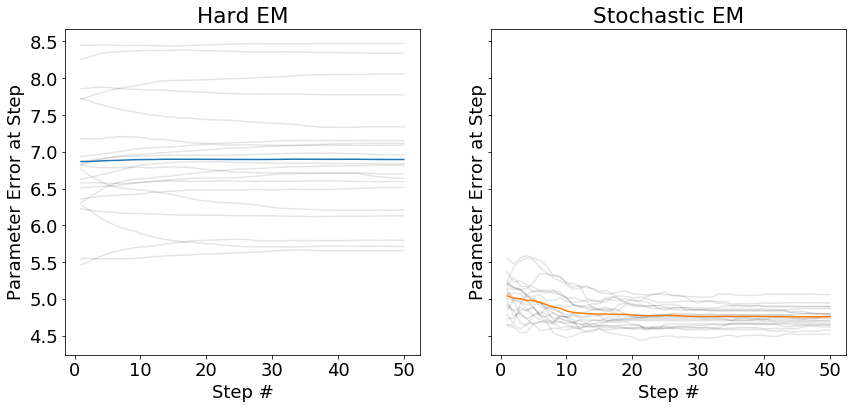

In [26]:
n = 250
d = 20
num_steps = 50
iters = 20
step_count = np.linspace(1,num_steps,num_steps)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)
em_mcmc_average = np.zeros(num_steps)
sls_average = np.zeros(num_steps)
w_baselines = list()
baseline_errors = list()

x, y, w0 = generate_distribution(n=n, dim=d,  dist='normal', bias=False, noise=0)

for i in range(iters):
    print(i, end=' ')
    y_ = np.random.permutation(y)
    w_baseline = lr.fit(x,y_).coef_.reshape(-1,1)
    w_baselines.append(w_baseline)

    weights = em_mcmc(x,y_,steps=num_steps,return_all_weights=True,verbose=False)
    mses = [calc_error(w0, w) for w in weights]
    ax2.plot(step_count, mses,'k-',alpha=0.1)
    em_mcmc_average += mses

    weights= sls(x,y_,steps=num_steps,return_all_weights=True, n_starts=n)
    mses = [calc_error(w0, w) for w in weights]
    ax1.plot(step_count, mses,'k-',alpha=0.1)
    sls_average += mses

ax1.plot(step_count, sls_average/iters,'C0')        
ax2.plot(step_count, em_mcmc_average/iters,'C1')        
ax1.set_title("Hard EM")
ax2.set_title("Stochastic EM") 
ax1.set_xlabel("Step #")
ax1.set_ylabel("Parameter Error at Step")    
ax2.set_xlabel("Step #")
ax2.set_ylabel("Parameter Error at Step")        

# Figure 4
Sparse permutation

In [5]:
steps = 15
iters = 1
n = 1000
d = 100
k = [250 # number of mismatches

error_hard_scale = np.zeros( steps)
error_soft_scale = np.zeros( steps)
for s in range(steps):
    x, y_, w0_ = generate_distribution(n=n, dim=d,  dist='normal', bias=False, noise=0.0)
    y    = y_
    idx1 = np.random.permutation(n)[:k]
    idx2 = idx1
    idx2 = np.random.permutation(idx1) # in-place shuffle elements of idx2
    y[idx1,0] = y_[idx2,0]
    #print('here')
    weights = em_mcmc(x,y,steps=50,return_all_weights=True)
    error = calc_error(w0_, weights[-1])
    print(error)
    error_soft_scale[s] = error
    weights = sls_init(x,y,steps=50,return_all_weights=False, n_starts=0)
    error = calc_error(w0_, weights[-1])
    error = np.linalg.norm(weights - w0_)
    print(error)
    error_hard_scale[s] = error
    


KeyboardInterrupt: 

In [3]:
print(np.mean(error_hard_scale,axis = 0))
print(np.mean(error_soft_scale,axis = 0))

6.2282346291117685
8.750172063493654


# Figure 4
Sparse permutation

In [ ]:
steps = 3
iters = 1
n   = 1000
d   = 100
k_  = [200,250,300,350,400,500,550,600,650,700,750,800] # number of mismatches
#k_  = [200]
error_proposed = np.zeros((len(k_),steps))
error_hard_scale = np.zeros((len(k_),steps))
error_soft_scale = np.zeros((len(k_),steps))
SNR = 100
for i in range(len(k_)):
    k = k_[i]
    for s in range(steps):
        x, y_, w0_ = generate_distribution(n=n, dim=d,  dist='normal', bias=False, SNR=100)
        y    = y_
        idx1 = np.random.permutation(n)[:k]
        idx2 = idx1
        idx2 = np.random.permutation(idx1) # in-place shuffle elements of idx2
        y[idx1,0] = y_[idx2,0]
#-------------------------------------------------------------        
        weights = em_mcmc(x,y,steps=50,return_all_weights=True)
        error = calc_error(w0_, weights[-1])
        error_soft_scale[i,s] = error            
        print(error)
#-------------------------------------------------------------
        weights = sls(x,y,steps=50,return_all_weights=True,n_starts=100)
        error = calc_error(w0_, weights[-1])
        error_hard_scale[i,s] = error        
        print(error)
#-------------------------------------------------------------------------
        weights = sls_init(x,y,steps=50,r_local=0,r=0)
        error = np.linalg.norm(weights - w0_)
        error_proposed[i,s] = error
        print(error)
#-------------------------------------------------------------        
    

6.425981994989094


In [7]:
hard = np.mean(error_hard_scale,axis = 1)
proposed = np.mean(error_proposed,axis = 1)
stochastic = np.mean(error_soft_scale,axis = 1)
mdict = {"naive_altMIn":hard,"proposed":proposed,"stochastic":stochastic,"k_":k_}
savemat("dataAltMin.mat",mdict)
print(hard)
print(stochastic)
print(proposed)


[10.5  10.77 13.22 14.86 15.1  13.54 13.72 16.06 14.43 14.59 15.22 15.1 ]
[ 7.9   7.51  7.95  8.7   9.39  8.79  9.25 10.03  9.9   9.42  9.96  9.89]
[ 2.64  2.95  3.28  3.66  4.46  4.78  5.7   6.81  7.5   7.34  9.25 10.41]


In [ ]:
steps = 5
iters = 1
n   = 1000
d   = 100
r_  = [100,200,250,400,500] # number of mismatches
#k_  = [200]
error_proposed = np.zeros((len(k_),steps))
error_hard_scale = np.zeros((len(k_),steps))
error_soft_scale = np.zeros((len(k_),steps))
idxPermuted = np.zeros(n)
for i in range(len(r_)):
    r = r_[i]        
    grps = [int(t/r) for t in range(n)]
    for s in range(steps):
        x, y_, w0_ = generate_distribution(n=n, dim=d,  dist='normal', bias=False, noise=0.0)
        y    = y_
        for t in range(int(n/r)):
            idxPermuted[t*r + (t+1)*r] = t*r + np.random.permutation(r)
        y[idxPermuted,0] = y_[range(n),0]
#-------------------------------------------------------------        
        weights = em_mcmc(x,y,steps=50,return_all_weights=True,enhanced=True,groups=grps)
        error = calc_error(w0_, weights[-1])
        error_soft_scale[i,s] = error    
        print(error)
#-------------------------------------------------------------
        weights = sls(x,y,steps=50,return_all_weights=True,n_starts=n,enhanced=True,groups=grps)
        error = calc_error(w0_, weights[-1])
        error_hard_scale[i,s] = error        
        print(error)
#-------------------------------------------------------------------------
        weights = sls_init(x,y,steps=50,return_all_weights=False, n_starts=0,r_local=1,r=r)
        error = np.linalg.norm(weights - w0_)
        error_proposed[i,s] = error
        print(error)
#-------------------------------------------------------------       

TypeError: generate_distribution() got an unexpected keyword argument 'noise'

ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

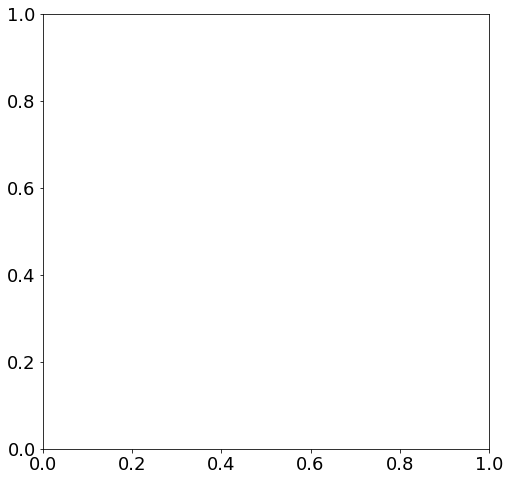

In [118]:
x = 5*np.array(range(steps))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(x,np.mean(error_hard_scale,axis=0),'o-',label='Hard')
print(np.mean(error_hard_scale,axis=1))
ax.fill_between(x,np.mean(error_hard_scale,axis=0)-np.std(error_hard_scale,axis=0),np.mean(error_hard_scale,axis=0)+np.std(error_hard_scale,axis=0),alpha=0.3)
ax.plot(x,np.mean(error_soft_scale,axis=0),'o-',label='Soft')
print(np.mean(error_soft_scale,axis=1))
ax.fill_between(x,np.mean(error_soft_scale,axis=0)-np.std(error_soft_scale,axis=0),np.mean(error_soft_scale,axis=0)+np.std(error_soft_scale,axis=0),alpha=0.3)
ax.set_ylabel('Inference Error')
ax.set_xlabel('# of Shuffles')
ax.set_title('Inference Error for Hard and Stochastic EM')
ax.legend(fancybox=True, framealpha=0.5,loc='lower right')


In [16]:
print(np.mean(error_hard_scale,axis=0))

[3.86e-15 3.86e-15 3.86e-15 3.86e-15 3.86e-15 3.86e-15 3.86e-15 3.86e-15
 3.86e-15 3.86e-15]


# Figure 5(a): Aptamer Dataset

### Load the Datasets

In [29]:
datadir = 'datasets/knight84-training.csv'
f, l, _ = load_dataset_clusters(datadir, n_clusters=1, normalize=True)

i = 0
X = f[i*5000:(i+1)*5000,:]
y = l[i*5000:(i+1)*5000]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
lr.fit(X_train, y_train)
y_ = lr.predict(X_test)
means_ols = (calc_rmse(y_, y_test),calc_rmse(y_, y_test))

### Run the Algorithms

In [30]:
n, d = X_train.shape
n = int(n/4)
n_clusters = [3,4]
fraction_missorted = 0.01
iters = 1
np.random.seed(0)

mse_baseline = np.zeros((iters,len(n_clusters)))
mse_sls = np.zeros((iters,len(n_clusters)))
mse_mcmc = np.zeros((iters,len(n_clusters)))

for j, n_cluster in enumerate(n_clusters):
    print(n_cluster, end='| ')
    for i in range(iters):
        print(i, end=' ')
        features, labels, cluster_vector = shuffle_within_num_groups(X_train, y_train, n_clusters=n_cluster, fraction_missorted=fraction_missorted)

        w = em_mcmc(features,labels, mcmc_steps=int(n*np.log(n)), interval_between_mcmc_steps=n/10, enhanced=True, groups=cluster_vector)
        y_ = X_test.dot(w)
        stoc = calc_rmse(y_, y_test)
        mse_mcmc[i,j] = stoc

        w = sls(features,labels,n_starts=n, enhanced=True, groups=cluster_vector)
        y_ = X_test.dot(w)
        hard = calc_rmse(y_, y_test)
        mse_sls[i,j] = hard

        lr.fit(features, labels)
        y_ = lr.predict(X_test)
        base = calc_rmse(y_, y_test)
        mse_baseline[i,j] = base

3| 0 4| 0 

### Plot the Results

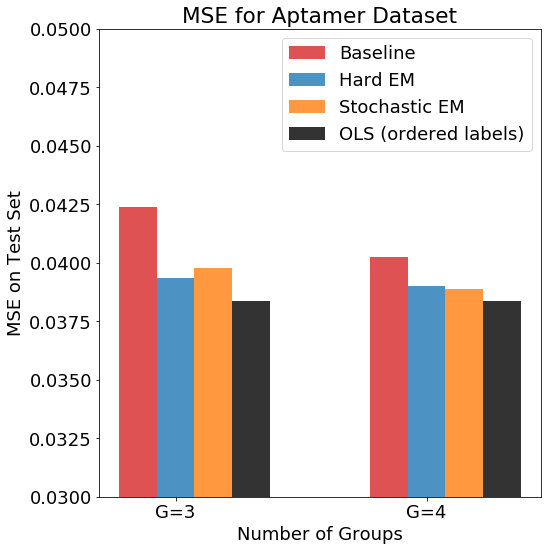

In [31]:
n_groups = 2
means_baseline = (np.mean(mse_baseline[:,0]), np.mean(mse_baseline[:,1]))
std_baseline = (np.std(mse_baseline[:,0]), np.std(mse_baseline[:,1]))
means_hard = (np.mean(mse_sls[:,0]), np.mean(mse_sls[:,1]))
std_hard = (np.std(mse_sls[:,0]), np.std(mse_sls[:,1]))
means_stochastic = (np.mean(mse_mcmc[:,0]), np.mean(mse_mcmc[:,1]))
std_stochastic = (np.std(mse_mcmc[:,0]), np.std(mse_mcmc[:,1]))
means_ols = means_ols
 
# create plot
fig, ax = plt.subplots(figsize=[8,8])
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, means_baseline, bar_width,
                 alpha=opacity,
                 yerr=std_baseline,
                 color='C3',
                 label='Baseline')
 
rects2 = plt.bar(index + bar_width, means_hard, bar_width,
                 alpha=opacity,
                 yerr=std_hard,
                 label='Hard EM')

rects3 = plt.bar(index + 2*bar_width, means_stochastic, bar_width,
                 alpha=opacity,
                 yerr=std_stochastic,
                 label='Stochastic EM')

rects4 = plt.bar(index + 3*bar_width, means_ols, bar_width,
                 alpha=opacity,
                 color='k',
                 label='OLS (ordered labels)')


plt.xlabel('Number of Groups')
plt.ylabel('MSE on Test Set')
plt.title('MSE for Aptamer Dataset')
plt.xticks(index + bar_width, ('G=3','G=4'))
plt.legend()
plt.ylim([0.03, 0.05])
 
plt.tight_layout()
plt.show()

# Figure 5(b): Boston Housing Dataset

### Load the Dataset

In [32]:
boston = load_boston()
X_ = boston.data
N, D = X_.shape
X = np.ones((N,D+1))
X[:,:-1] = X_
y = boston.target
y = normalize(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
lr.fit(X_train, y_train)
y_ = lr.predict(X_test)
means_ols = calc_rmse(y_, y_test) 

### Run the Algorithms

In [33]:
np.random.seed(0)
n, d = X_train.shape
n_clusters = [3, 4]
iters = 1
f = 2

mse_baseline = np.zeros((iters,len(n_clusters)))
mse_sls = np.zeros((iters,len(n_clusters)))
mse_mcmc = np.zeros((iters,len(n_clusters)))

for j, n_cluster in enumerate(n_clusters):
    print(n_cluster, end='| ')
    for i in range(iters):
        features, labels, cluster_vector = shuffle_within_num_groups_by_feature(X_train, y_train, f, n_clusters=n_cluster)

        w = em_mcmc(features,labels, mcmc_steps=int(n*np.log(n)), interval_between_mcmc_steps=n/10, enhanced=True, groups=cluster_vector)
        y_ = X_test.dot(w)
        stoc = calc_rmse(y_, y_test)
        mse_mcmc[i,j] = stoc

        w = sls(features,labels,n_starts=n, enhanced=True, groups=cluster_vector)
        y_ = X_test.dot(w)
        hard = calc_rmse(y_, y_test)
        mse_sls[i,j] = hard

        lr.fit(features, labels)
        y_ = lr.predict(X_test)
        base = calc_rmse(y_, y_test)
        mse_baseline[i,j] = base

3| 4| 

### Plot the Results

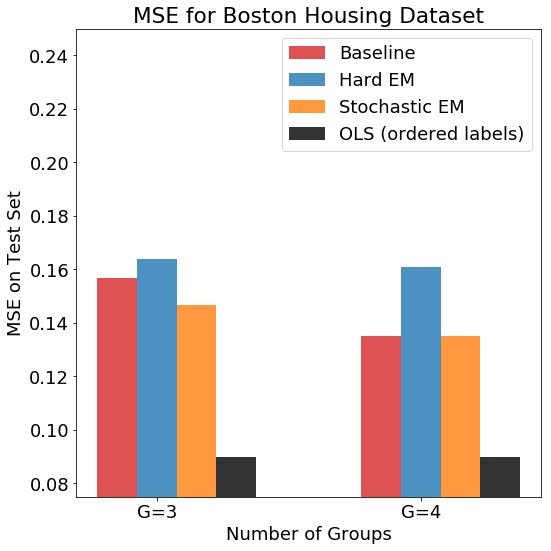

In [34]:
n_groups = 2

means_baseline = (np.mean(mse_baseline[:,0]), np.mean(mse_baseline[:,1]))
std_baseline = (np.std(mse_baseline[:,0]), np.std(mse_baseline[:,1]))
means_hard = (np.mean(mse_sls[:,0]), np.mean(mse_sls[:,1]))
std_hard = (np.std(mse_sls[:,0]), np.std(mse_sls[:,1]))
means_stochastic = (np.mean(mse_mcmc[:,0]), np.mean(mse_mcmc[:,1]))
std_stochastic = (np.std(mse_mcmc[:,0]), np.std(mse_mcmc[:,1]))
means_ols = means_ols
 
# create plot
fig, ax = plt.subplots(figsize=[8,8])
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, means_baseline, bar_width,
                 alpha=opacity,
                 yerr=std_baseline,
                 color='C3',
                 label='Baseline')
 
rects2 = plt.bar(index + bar_width, means_hard, bar_width,
                 alpha=opacity,
                 yerr=std_hard,
                 label='Hard EM')

rects3 = plt.bar(index + 2*bar_width, means_stochastic, bar_width,
                 alpha=opacity,
                 yerr=std_stochastic,
                 label='Stochastic EM')

rects4 = plt.bar(index + 3*bar_width, means_ols, bar_width,
                 alpha=opacity,
                 color='k',
                 label='OLS (ordered labels)')


plt.xlabel('Number of Groups')
plt.ylabel('MSE on Test Set')
plt.title('MSE for Boston Housing Dataset')
plt.xticks(index + bar_width, ('G='+str(n_clusters[0]),'G='+str(n_clusters[1])))
plt.legend()
plt.ylim([0.075, 0.25])
 
plt.tight_layout()
plt.show()

In [ ]:
def get_permutation (n,num_assigned):
    P = np.eye(n)
    idx = np.random.permutation(n)[0:n-num_assigned]
    P[idx,idx] = 0
    P[idx,np.random.permutation(idx)] = 1    
    return P